In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [12]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
X = red_wine.drop(columns = ["quality"]).values  #Feature Variables
Y = red_wine["quality"].values

#train 70%, test 15%, validate 15%
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size = 0.5, random_state = 42)

X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

weights = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train # w = (X^T X)^-1 X^T Y

y_train_pred = X_train_bias @ weights
y_test_pred = X_test_bias @ weights

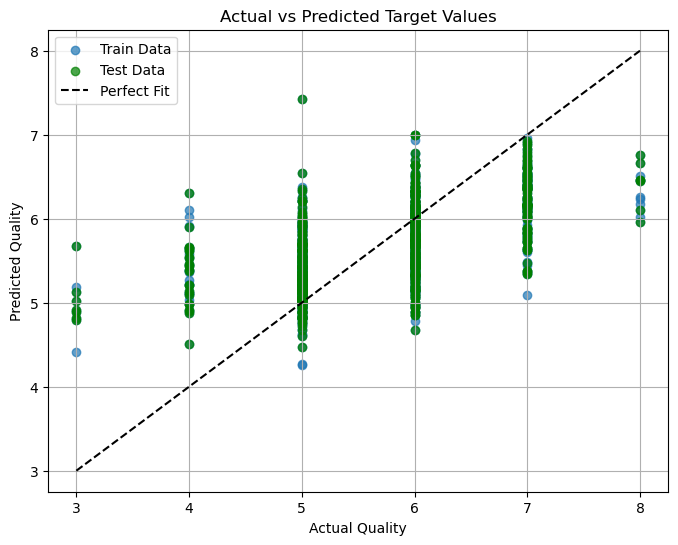

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, y_train_pred, label="Train Data", alpha=0.7)
plt.scatter(Y_test, y_test_pred, label="Test Data", alpha=0.7, color='green')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', label="Perfect Fit")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Target Values")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))

rmse_train, rmse_test

(0.6486806989670353, 0.6379522251753128)

In [27]:
weights_lms = np.random.rand(X_train_bias.shape[1])
stepsize = 0.00001 
iterations = 1000

for iteration in range(iterations):
    y_train_pred_lms = X_train_bias @ weights_lms
    gradient = -(1 / len(Y_train)) * (X_train_bias.T @ (Y_train - y_train_pred_lms))
    weights_lms -= stepsize * gradient

y_train_pred_lms = X_train_bias @ weights_lms
y_test_pred_lms = X_test_bias @ weights_lms

In [28]:
rmse_train_lms = np.sqrt(mean_squared_error(Y_train, y_train_pred_lms))
rmse_test_lms = np.sqrt(mean_squared_error(Y_test, y_test_pred_lms))

rmse_train_lms, rmse_test_lms

(2.082800298442102, 2.0995088400383746)